In [51]:
import osmnx as ox
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
print("loaded")
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'grey', 'lightblue', 'cyan', 'magenta', 'red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'grey', 'lightblue', 'cyan', 'magenta']
arrondissements = [

    'Ahuntsic-Cartierville',
    'Anjou',
    'Côte-des-Neiges–Notre-Dame-de-Grâce',
    'Lachine',
    'LaSalle',
    'Le Plateau-Mont-Royal',
    'Le Sud-Ouest',
    'L\'Île-Bizard–Sainte-Geneviève',
    'Mercier–Hochelaga-Maisonneuve',
    'Montréal-Nord',
    'Outremont',
    'Pierrefonds-Roxboro',
    'Rivière-des-Prairies–Pointe-aux-Trembles',
    'Rosemont–La Petite-Patrie',
    'Saint-Laurent',
    'Saint-Léonard',
    'Verdun',
    'Ville-Marie',
    'Villeray–Saint-Michel–Parc-Extension'
]

loaded


In [72]:
def get_graph(name):
    G = ox.graph_from_place(name, network_type='drive')
    G = ox.project_graph(G)
    return G

In [4]:
def get_color(node, comp):
    for count, components in enumerate(comp):
        if node in components:
            return colors[count]
    return None
        
def color_graph(G):
    # Tarjan algorithm
    strong_components = nx.strongly_connected_components(G)

    # Print the strongly connected components
    print("Strongly Connected Components:")
    comp = []
    for component in strong_components:
        comp.append(component)
        #print(component)
    node_colors = []
    colored_nodes = []
    for node in G.nodes:
        color = get_color(node, comp)
        node_colors.append(color)
    return node_colors, colored_nodes

def display_and_color_graph(G):
    ox.plot_graph(G)
    node_colors, colored_nodes = color_graph(G)

    fig, ax = ox.plot_graph(G, node_color=node_colors, edge_color='grey', bgcolor='black', show=False, close=False)

    for node in G.nodes:
        pass
        #if node in colored_nodes:
        #    x, y = G.nodes[node]['x'], G.nodes[node]['y']
        #    ax.text(x, y, node, fontsize=8, ha='center', va='center', color='white')

In [5]:
def find_circuit(G):
    undirected = G.to_undirected()
    eulerized = nx.eulerize(undirected)
    return nx.eulerian_circuit(eulerized), eulerized

def find_index(circuit, x, y):
    for i, (src, dst) in enumerate(circuit):
        if src == x and dst == y:
            return i
    return -1

def display_circuit(G, circuit):
    fig, ax = ox.plot_graph(G, figsize=(20,20), edge_color='green', bgcolor='black', node_color='yellow')
    for e in G.edges.data():
        x, y = e[0], e[1]
        index = find_index(circuit, x,y)
        if index != -1:
            posX = (G.nodes[x]['x'] + G.nodes[y]['x']) / 2
            posY = (G.nodes[x]['y'] + G.nodes[y]['y']) / 2
            ax.text(posX,posY, index, fontsize=8, ha='center', va='center', color='white')
    

In [74]:
def process_graphs(names, node_colors, graph):
    for i, n in enumerate(names):
        print("Name: " + n)
        g = get_graph(n + ", Montreal, Canada")
        print("Got graph number " + str(i))
        node_colors = [colors[i] if node in g.nodes and node_colors[j] == "black" else node_colors[j] for j, node in enumerate(graph.nodes)]
        print("deleting graph")
        del g
    return node_colors

In [73]:
# process_graphs(arrondissements[1:2])
montreal = get_graph("Montreal, Canada")
#ox.plot_graph(montreal, figsize=(20,20))

In [7]:
def chinese_postman(graph):
    odd_nodes = [node for node, degree in graph.degree() if degree % 2 == 1]
    G = nx.MultiGraph()
    G.add_nodes_from(odd_nodes)
    print(len(G.nodes))
    for i,n1 in enumerate(G.nodes):
        print(i)
        for n2 in G.nodes:
            if n1 == n2:
                continue
            try:
                length = nx.shortest_path(graph, source=n1, target=n2)
                # print(length)
                G.add_edge(n1, n2, weight=length)
            except:
                pass

In [29]:
node_colors = ["black" for node in montreal.nodes]

In [75]:
nc = process_graphs(arrondissements, node_colors, montreal)

#ox.plot_graph(montreal, figsize=(20,20), edge_color='white', bgcolor='black', node_color=node_colors)

Name: Ahuntsic-Cartierville
Got graph number 0
deleting graph
Name: Anjou
Got graph number 1
deleting graph
Name: Côte-des-Neiges–Notre-Dame-de-Grâce
Got graph number 2
deleting graph
Name: Lachine
Got graph number 3
deleting graph
Name: LaSalle
Got graph number 4
deleting graph
Name: Le Plateau-Mont-Royal
Got graph number 5
deleting graph
Name: Le Sud-Ouest
Got graph number 6
deleting graph
Name: L'Île-Bizard–Sainte-Geneviève
Got graph number 7
deleting graph
Name: Mercier–Hochelaga-Maisonneuve
Got graph number 8
deleting graph
Name: Montréal-Nord
Got graph number 9
deleting graph
Name: Outremont
Got graph number 10
deleting graph
Name: Pierrefonds-Roxboro
Got graph number 11
deleting graph
Name: Rivière-des-Prairies–Pointe-aux-Trembles
Got graph number 12
deleting graph
Name: Rosemont–La Petite-Patrie
Got graph number 13
deleting graph
Name: Saint-Laurent
Got graph number 14
deleting graph
Name: Saint-Léonard
Got graph number 15
deleting graph
Name: Verdun
Got graph number 16
deletin

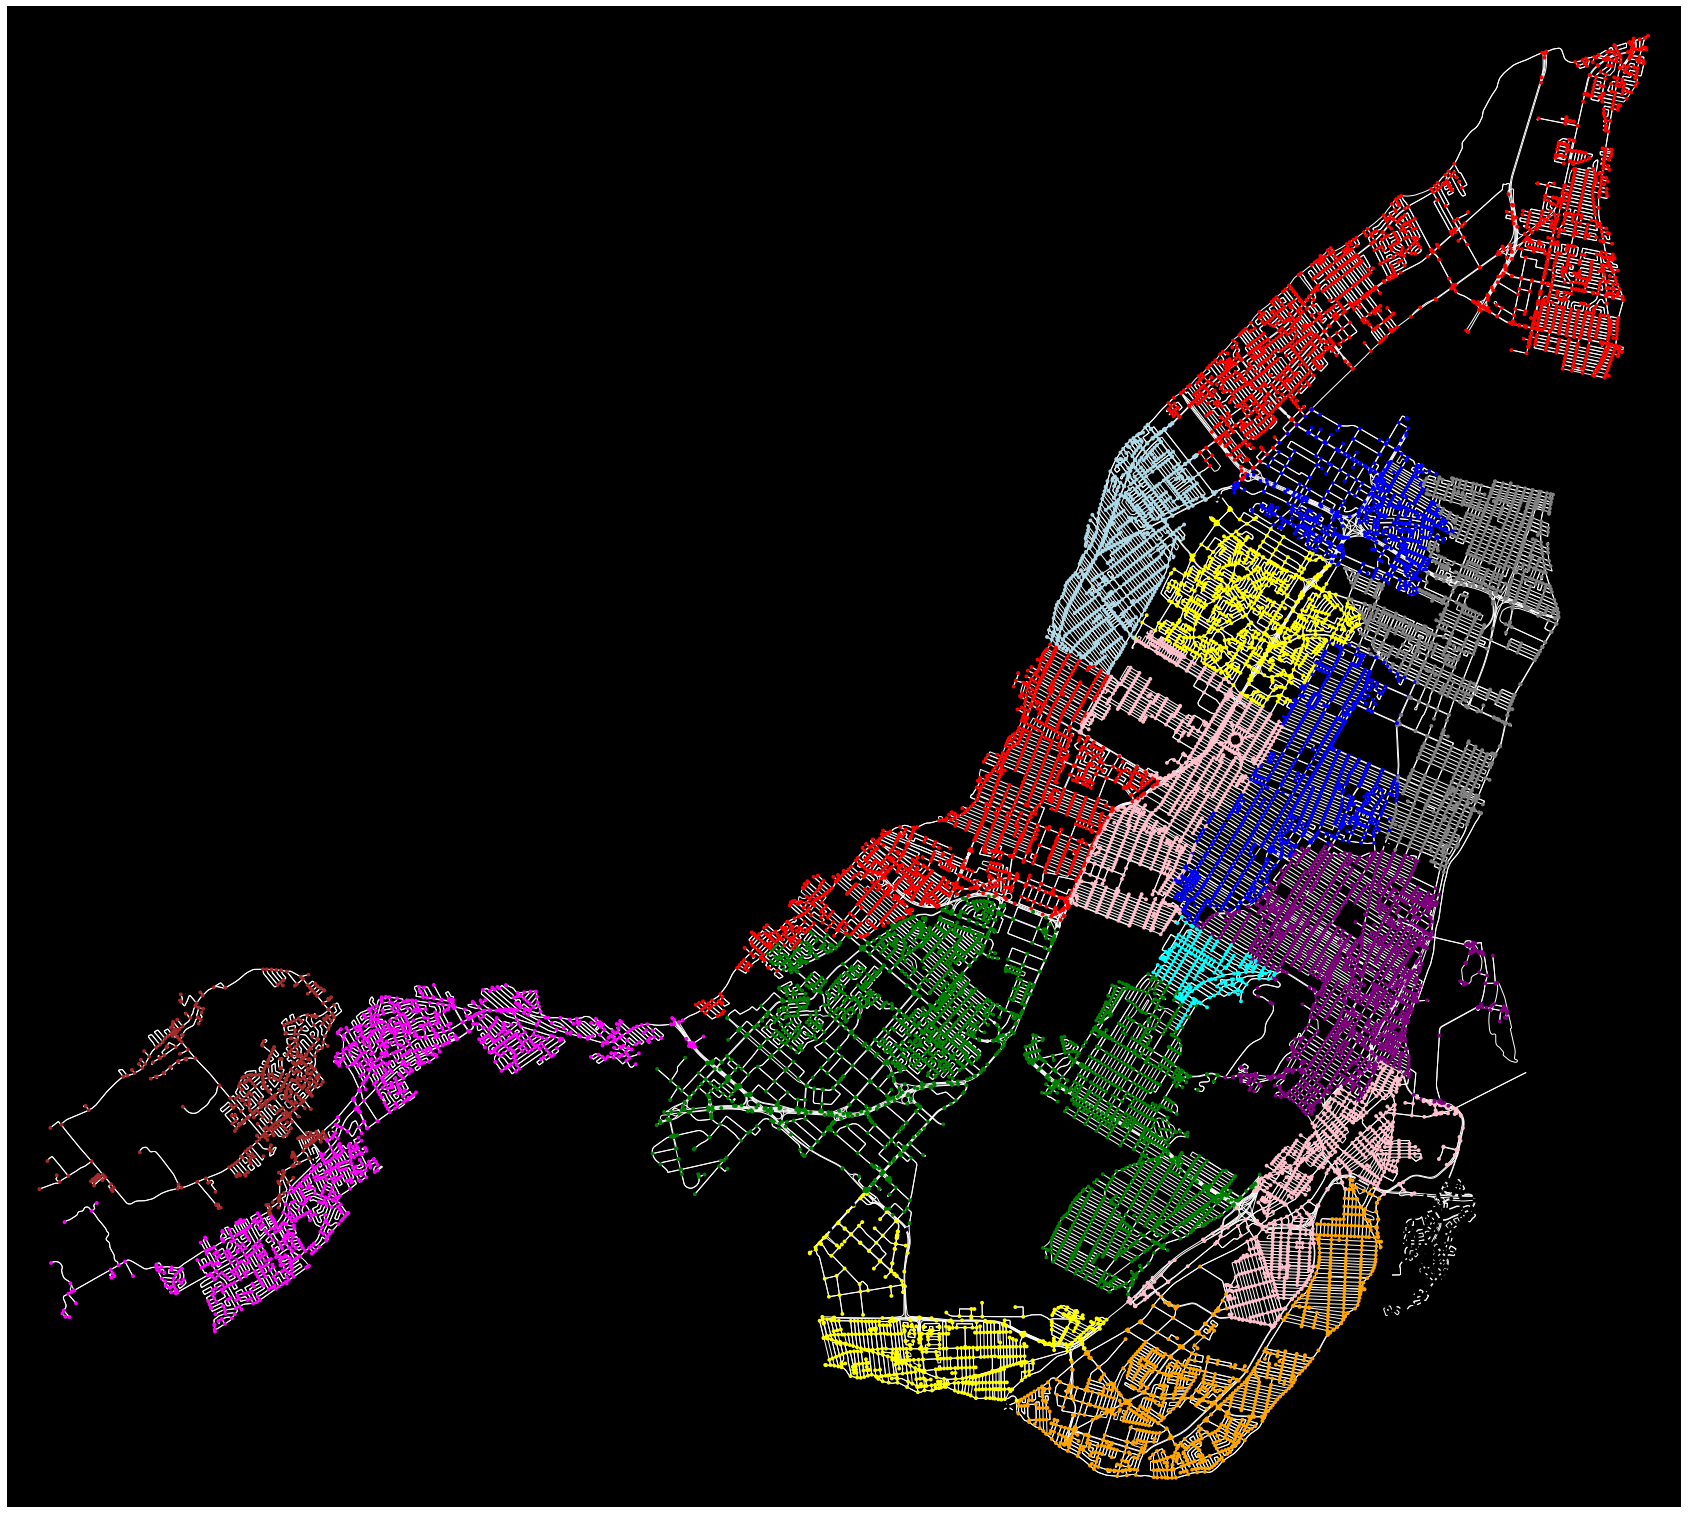

(<Figure size 2160x2160 with 1 Axes>, <AxesSubplot:>)

In [76]:
ox.plot_graph(montreal, figsize=(30,30), edge_color='white', bgcolor='black', node_color=nc)